## `MeshArrays.jl` test suite uses a global smoother function

Load the `MeshArrays.jl` and `Plots.jl` package modules

In [1]:
using MeshArrays, Plots

Define a grid with `6` faces of `16*16` points and distances, areas, etc. all set to `1.0`:

In [2]:
GridVariables=GridOfOnes("cs",6,16);

Smooth a field of random noise defined over the 6 faces of a cube:

In [3]:
DemoVariables=MeshArrays.demo2(GridVariables);

Include `heatmap` method and use it to vizualize the final result:

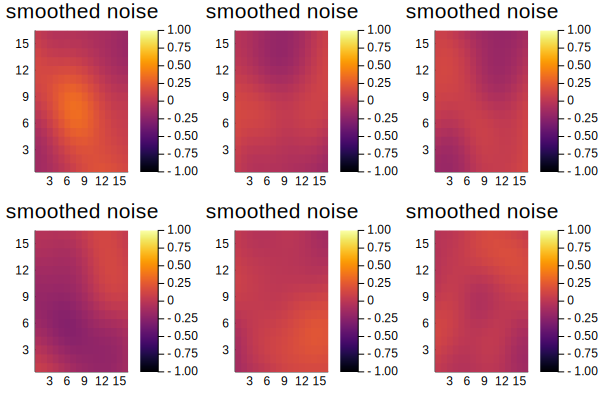

In [4]:
include(joinpath(dirname(pathof(MeshArrays)),"Plots.jl"))
heatmap(DemoVariables[2],title="smoothed noise",clims=(-1.0,1.0))

Note the increased smoothness and reduced magnitude as compared with the initial condition:

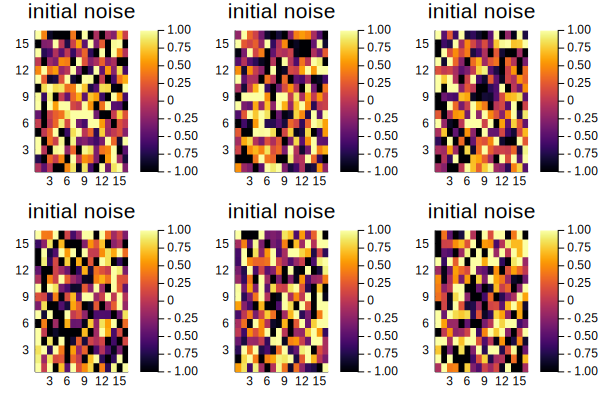

In [5]:
heatmap(DemoVariables[1],title="initial noise",clims=(-1.0,1.0))

To finish, let's benchmark `smooth` as a function of smoothing scale parameters:

In [6]:
Rini=DemoVariables[1]
DXCsm=DemoVariables[3]
DYCsm=DemoVariables[4]
@time Rend=smooth(Rini,DXCsm,DYCsm,GridVariables);
@time Rend=smooth(Rini,2DXCsm,2DYCsm,GridVariables);

  0.002429 seconds (8.21 k allocations: 6.797 MiB)
  0.024160 seconds (30.69 k allocations: 24.272 MiB, 40.42% gc time)
